In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
movies = pd.read_csv(r"E:\Innomatics hackathon\data\movies.csv")
links = pd.read_csv(r"E:\Innomatics hackathon\data\links.csv")
rating = pd.read_csv(r"E:\Innomatics hackathon\data\ratings.csv")
tags = pd.read_csv(r"E:\Innomatics hackathon\data\tags.csv")

In [12]:
mov_rat = pd.merge(movies,rating,on='movieId')

In [29]:
movies


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:

rc = mov_rat.groupby('title').size()


In [23]:
max_ratings_movie = rc.idxmax()
max_ratings_movie

'Forrest Gump (1994)'

##### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [26]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [32]:
mov_tag = pd.merge(movies,tags,on='movieId')
mov_tag[mov_tag['title'] == 'Matrix, The (1999)']

,movieId,title,genres,userId,tag,timestamp
1313,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,martial arts,1457842912
1314,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424,sci-fi,1457842899
1315,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474,alternate universe,1137204991
1316,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,philosophy,1424141098
1317,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537,post apocalyptic,1424141101


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [33]:
mov_rat

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [34]:
mov_rat[mov_rat['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

In [36]:
rating_Fig = mov_rat[mov_rat['title'] == 'Fight Club (1999)']['rating']
rating_Fig

49835    5.0
49836    2.0
49837    0.5
49838    2.5
49839    3.5
        ... 
50048    5.0
50049    4.0
50050    5.0
50051    5.0
50052    5.0
Name: rating, Length: 218, dtype: float64

<Axes: xlabel='rating', ylabel='Count'>

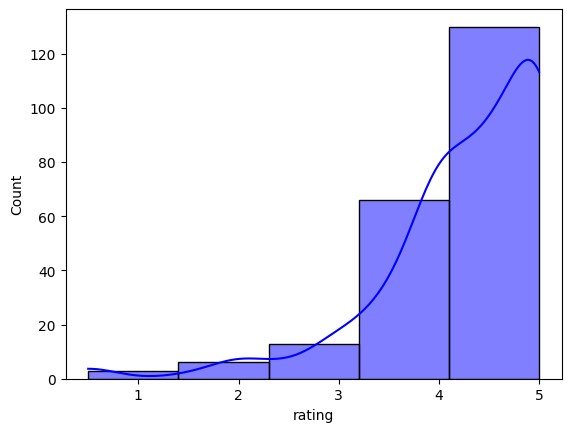

In [37]:
sns.histplot(rating_Fig, bins=5, kde=True, color='blue')

<Axes: xlabel='rating'>

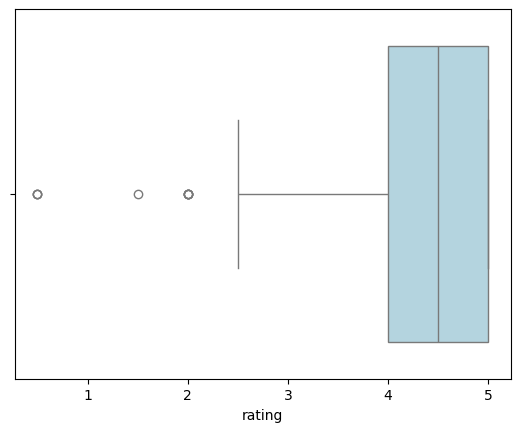

In [39]:
sns.boxplot(x=rating_Fig, color='lightblue')

# creatig a new df
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [40]:
grouped_ratings = rating.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

grouped_ratings

,movieId,rating_count,average_rating
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [42]:
merged_df = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
merged_df

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [71]:
filtered_movies = merged_df[merged_df['rating_count'] > 50]
filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [50]:
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

most_popular_movie

movieId                                        318
title             Shawshank Redemption, The (1994)
genres                                 Crime|Drama
rating_count                                   317
average_rating                            4.429022
Name: 277, dtype: object

#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [54]:


top_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

top_movies

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [72]:
filtered_movies['genres'] = filtered_movies['genres'].str.split('|')

C:\Users\abhiram yerramsetty\AppData\Local\Temp\ipykernel_13136\421291171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['genres'] = filtered_movies['genres'].str.split('|')


In [75]:
sci_fi_movies = filtered_movies[filtered_movies['genres'].apply(lambda x: 'Sci-Fi' in x)]

In [76]:
sci_fi_movies

,movieId,title,genres,rating_count,average_rating
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"[Mystery, Sci-Fi, Thriller]",177,3.983051
133,160,Congo (1995),"[Action, Adventure, Mystery, Sci-Fi]",57,2.877193
144,172,Johnny Mnemonic (1995),"[Action, Sci-Fi, Thriller]",53,2.679245
145,173,Judge Dredd (1995),"[Action, Crime, Sci-Fi]",62,2.669355
176,208,Waterworld (1995),"[Action, Adventure, Sci-Fi]",115,2.913043
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)","[Action, Adventure, Sci-Fi, IMAX]",69,3.869565
7749,91500,The Hunger Games (2012),"[Action, Adventure, Drama, Sci-Fi, Thriller]",54,3.435185
8358,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151
8457,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847


In [79]:
sorted_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
sorted_movies.iloc[2]

movieId                                             480
title                              Jurassic Park (1993)
genres            [Action, Adventure, Sci-Fi, Thriller]
rating_count                                        238
average_rating                                     3.75
Name: 418, dtype: object

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


##### Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [96]:
import requests
from bs4 import BeautifulSoup
import time

def scrapper(imdb_id, max_reviews=10):
    reviews = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    review_blocks = soup.find_all('div', class_='text show-more__control', limit=max_reviews)

    for review in review_blocks:
        reviews.append(review.text.strip())

    return reviews


filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: scrapper(str(x).zfill(7)))


print(filtered_movies_df[['movieId', 'title', 'imdb_reviews']].head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
3        6              Heat (1995)   
4        7           Sabrina (1995)   

                                        imdb_reviews  
0  [I am a big fan of the animated movies coming ...  
1  [I have not seen this movie in more then a dec...  
2  [Some people see this as an inferior sequel to...  
3  [I have very little interest in most action fi...  
4  [Although terribly predictable and a bit too l...  


###### join the links df

In [97]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [98]:
filtered_movies_df = pd.merge(filtered_movies,links,on='movieId')
filtered_movies_df

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0


In [99]:
filtered_movies_df['imdb_reviews'] = filtered_movies_df['imdbId'].apply(lambda x: scrapper(str(x).zfill(7)))

# Display the first few rows to confirm that reviews are being captured
filtered_movies_df

,movieId,title,genres,rating_count,average_rating,imdbId,tmdbId,imdb_reviews
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215,3.920930,114709,862.0,[I am a big fan of the animated movies coming ...
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110,3.431818,113497,8844.0,[I have not seen this movie in more then a dec...
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52,3.259615,113228,15602.0,[Some people see this as an inferior sequel to...
3,6,Heat (1995),"[Action, Crime, Thriller]",102,3.946078,113277,949.0,[I have very little interest in most action fi...
4,7,Sabrina (1995),"[Comedy, Romance]",54,3.185185,114319,11860.0,[Although terribly predictable and a bit too l...
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)","[Comedy, Crime, Drama]",54,3.916667,993846,106646.0,[It's no surprise that Scorsese is associated ...
432,109374,"Grand Budapest Hotel, The (2014)","[Comedy, Drama]",52,3.778846,2278388,120467.0,[That it was directed by Wes Anderson (who has...
433,109487,Interstellar (2014),"[Sci-Fi, IMAX]",73,3.993151,816692,157336.0,[After watching this insane movie in the theat...
434,112852,Guardians of the Galaxy (2014),"[Action, Adventure, Sci-Fi]",59,4.050847,2015381,118340.0,[One of the funniest Marvel films is a comedy ...


In [100]:
filtered_movies_df.to_csv(r'E:\Innomatics hackathon\movies_with_reviews.csv', index=False)

In [102]:
highest_rated_movie = filtered_movies_df.loc[filtered_movies_df['average_rating'].idxmax()]
highest_rated_movie

movieId                                                         318
title                              Shawshank Redemption, The (1994)
genres                                               [Crime, Drama]
rating_count                                                    317
average_rating                                             4.429022
imdbId                                                       111161
tmdbId                                                        278.0
imdb_reviews      [The Shawshank Redemption is written and direc...
Name: 53, dtype: object

In [105]:
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['average_rating'].idxmax()]
highest_rated_sci_fi_movie

movieId                                                 260
title             Star Wars: Episode IV - A New Hope (1977)
genres                          [Action, Adventure, Sci-Fi]
rating_count                                            251
average_rating                                     4.231076
Name: 224, dtype: object